In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

# 날짜데이터 처리 라이브러리
import datetime
import time

# 정규화 라이브러리
from sklearn.preprocessing import MinMaxScaler

In [2]:
# 지도 데이터 시각화 라이브러리
import geopandas as gpd
import pydeck
import folium
from folium import plugins
import pyecharts
pyecharts.online()
from pyecharts import Line, Bar, Pie, Overlap
from IPython.display import display, Image

import warnings
warnings.filterwarnings('ignore')

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "C:\Users\KBS\anaconda3\lib\site-packages\lml\utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


In [3]:
# 시각화, 한글깨짐 처리
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

<br>
<br>

# [ 코로나 * i  for  i  in  [유동인구, 고령층] ]

<br>
<br>
<br>

<br>
<br>


## 안녕하세요! 팀 'Job_seeker' 입니다! 

전 세계적인 질병의 대유행 상태인 '팬데믹'을 일으키고 있는 코로나에 전 세계 인류가 공포를 느끼고 있습니다. 

이러한 역사의 가운데에 서 있는 와중에, 코로나 데이터를 분석하여 코로나의 위험성을 조금이라도 줄여보고 싶은 생각으로
이번 대회에 참가하게 되었습니다.

저희 팀은 내용을 크게 세가지 **[현황 - 유동인구 - 고령층]**으로 분리하여 

**1. 코로나 사태 현황을 시각화하여 시간이 흐름에따라 변화 양상을 분석해보고,**

**2. 코로나의 전파율을 낮추기 위한 유동인구 제어의 필요성과,**

**3. 각 세대별, 특히 코로나 바이러스에 취약한 고령층에 대한 보호의 필요성에 대해 제시하려 합니다.**


감사합니다!


## 사용 데이터 셋

- TimeProvince.csv : 코로나 확진자 데이터 (출처: 데이콘)

- TimeAge.csv : 연령별 코로나 확진자 데이터 (출처: 데이콘)

- SeoulFolating.csv : 서울 유동인구 데이터 (출처: 데이콘)

- SearchTrend.csv : 코로나 검색량 데이터 (출처: 데이콘) 

- Policy.csv : 코로나 관련 정책 데이터 (출처: 데이콘)

- PatientInfo.csv : 코로나 확진자 정보 데이터 (출처: 데이콘)

- PatientRoute.csv : 코로나 확진자 이동경로 데이터 (출처: 데이콘)

- CARD_SUBWAY_MONTH_202001~4.csv : 20년 1월 ~ 4월 서울시 지하철 승차객 수 (출처: 서울열린데이터 광장)

- CARD_SUBWAY_MONTH_201901~4.csv : 19년 1월 ~ 4월 서울시 지하철 승차객 수 (출처: 서울열린데이터 광장)
 
- '선별진료소목록.xlsx' : 전국 선별진료소 목록 데이터 (출처: https://www.mohw.go.kr/react/popup_200128_3.html)

- '승차검진_선별진료소_목록.xlsx' : 전국 승차검진 선별진료소 목록 데이터 (출처: https://www.mohw.go.kr/react/popup_200128_3.html)

- 'aged_korea.csv' : 전국 고령화 데이터 (출처: 서울시빅데이터)

- 'sigungu.csv' : 전국 시군구 행정단위 데이터 (출처: 공공데이터포털)

- 음압_격리병상.csv : 전국 음압병상 및 국가지정 격리병상 데이터 (출처: 보건복지부 및 질병관리본부)

- 2020년_인구.txt : 2020년 인구 데이터 (출처: 서울시빅데이터)

- korea2.json : 전국 행정구역 데이터 (출처: 공공데이터포털)



# 목차


### 1. 코로나 현황

   1-1. 누적현황<br>
   1-2. 일별현황 <br>
   1-3. 일별 실질적 코로나환자 <br>
   1-4. 국내 지역별 현황 <br> 
   1-5. 확진자 이동동선 파악 
 
### 2. 코로나 * 유동인구

   2-1. 유동인구가 코로나에 끼치는 영향<br>
   2-2. 코로나 관심도와 유동인구 추이<br>
   2-3. 서울시 유동인구 3D지도 시각화<br>
   2-4. 서울시 유동인구에 따른 접촉자 수 파악<br>
   2-5. 지하철 승객수로 본 서울시 유동인구<br>
   2-6. 코로나 이후 유동인구 변화<br>
   2-7. 신규확진자에 따른 유동인구 변화<br>
   2-8. 재난경보 단계에 따른 유동인구 변화<br>
   2-9. 사회적거리두기 단계에 따른 유동인구 변화<br>
   2-10. 개학연기에 따른 유동인구 변화

### 3. 코로나 * 고령층

   3-1. 연령대별 코로나 현황<br>
   3-2. 고령층 감염경로<br>
   3-3. 지역별 고령화에 따른 코로나 검사 속도 파악<br>
   3-4. 지역별 & 연령대별 검진속도<br>
   3-5. 음압병상 및 격리병상 현황<br>
   3-6. 고령층 확진자 대비  음압/격리병상 수용력<br>
   3-7. 지역별 예상 고령층 확진자 대비 음압/격리병상 수용력<br>
   3-8. 지역별 예상 고령층 확진자 대비 필요한 음압/격리병상 수

### 4. 결론 및 제언

<br>
<br>
<br>
<br>


# 1. 코로나 현황

## 1-1. 누적현황

In [5]:
코로나_확진현황 = pd.read_csv('TimeProvince.csv')
코로나_확진현황_1 = 코로나_확진현황.groupby(by='date').sum().reset_index()

In [6]:
date = list(코로나_확진현황_1['date'])
confirmed = list(코로나_확진현황_1['confirmed'])
released = list(코로나_확진현황_1['released'])
deceased = list(코로나_확진현황_1['deceased'])

In [7]:
line = Line("대한민국 코로나19 누적현황", "누적 코로나 환자 현황입니다. 스크롤을 줄여 세부사항을 확인해보세요!",width=900,height=500 )
line.add("확진자(명)", date, confirmed,  label_color=['red'], is_datazoom_show=True, datazoom_range=[0, 100]
         , mark_point_symbolsize=80, area_opacity=0.6, mark_point_size=40, legend_pos= 'right'
         ,mark_point=['max']
        )
line.add("완치자(명)", date, released,  label_color=['#E4E3E6'] 
         , mark_point_symbolsize=80, area_opacity=0.8,mark_point_textcolor='black', legend_pos= 'right'
         ,mark_point=['max']
        )
line.add("사망자(명)", date, deceased
         , mark_point_symbolsize=80, area_opacity=0.6, label_color=['black'] , legend_text_size=15, legend_pos= 'right'
         ,mark_point=['max']
        )
line

첫 확진자가 발생한 2020년 1월 20일부터 4월 30일까지의 코로나19의 일별 누적현황입니다.

사망자의 비율은 매우 낮으며, **급격히 증가한 누적확진자 추이가 시간 차를 두고 완치자로 대체**되는 것을 확인할 수 있습니다.

## 1-2. 일별현황

In [8]:
코로나_확진현황_2 = 코로나_확진현황_1.copy()
확진자 = 코로나_확진현황_2['confirmed']

today = [1]

for i,j in enumerate(확진자) :
    if i >= 1 :
        one_day = j - 확진자[i-1]
        today.append(one_day)

완치자 = 코로나_확진현황_2['released']
today_1 = [0]
for i,j in enumerate(완치자) :
    if i >= 1 :
        one_day = j - 완치자[i-1]
        today_1.append(one_day)

사망자 = 코로나_확진현황_2['deceased']
today_2 = [0]
for i,j in enumerate(사망자) :
    if i >= 1 :
        one_day = j - 사망자[i-1]
        today_2.append(one_day)

코로나_확진현황_2['일별_확진자'] = today
코로나_확진현황_2['일별_완치자'] = today_1
코로나_확진현황_2['일별_사망자'] = today_2

In [9]:
line = Line("대한민국 코로나19 일별현황",'일별 신규로 발생한 코로나환자 현황입니다. 스크롤을 줄여 세부사항을 확인해보세요!',width=850,height=500 )
line.add("확진자(명)", date, 코로나_확진현황_2['일별_확진자'],  label_color=['red'], is_datazoom_show=True, datazoom_range=[0, 100]
         , mark_point_symbolsize=50,  mark_point_size=60 , legend_text_size=15, legend_pos= 'right'
         ,mark_point=['max','min'], mark_line=["average"]
        )
line.add("완치자(명)", date, 코로나_확진현황_2['일별_완치자'],  label_color=['#C0BCC2']
         , mark_point_symbolsize=60,mark_point_textcolor='black'
         ,mark_point=['max'], mark_line=["average"], legend_text_size=1, legend_pos= 'right'
        )
line.add("사망자(명)", date, 코로나_확진현황_2['일별_사망자']
         , mark_point_symbolsize=60, mark_line=["average"]
         ,mark_point=['max'], label_color=['black'], legend_text_size=15, legend_pos= 'right'
         
        )
line

2020년 1월 20일부터 4월 30일까지 일별로 발생한 코로나19의 현황입니다.
 
2월 29일이 813명으로 신규 확진자가 가장 많으며 이후 **2주 후 평균 수준으로 급락**한 것을 확인할 수 있습니다.

## 1-3. 일별 실질적 코로나환자

In [10]:
코로나_확진현황_3 = 코로나_확진현황_2.copy()
코로나_확진현황_3['일별_코로나환자'] = 코로나_확진현황_2['confirmed']-코로나_확진현황_2['released']-코로나_확진현황_2['deceased']

일별_코로나환자 = 코로나_확진현황_3['일별_코로나환자']

전날대비_코로나환자 =[1]
for i,j in enumerate(일별_코로나환자) :
    if i >= 1 :
        increase = j - 일별_코로나환자[i-1]
        전날대비_코로나환자.append(increase)

코로나_확진현황_3['전날대비_코로나환자'] = 전날대비_코로나환자

In [11]:
line = Line("일별 코로나와 싸우고 있는 환자",'일자별 환자 수와 전날대비 증가/감소한 환자 수 추이 입니다. 스크롤을 줄여 세부사항을 확인해보세요!') # 글씨체 키우기
line.add("일별 코로나19 환자 수(10명)", date, 코로나_확진현황_3['일별_코로나환자']/10,  label_color=['#192F5E'], is_datazoom_show=True,datazoom_range=[0, 100]
         , mark_point_symbolsize=70, line_width=4, label_text_size=15, legend_text_size=15, legend_pos= 'right'
         ,mark_point=['max','min'], mark_line=["average"])
bar = Bar()
bar.add("전날대비 신규 코로나환자 증감(명)",코로나_확진현황_3['date'],코로나_확진현황_3['전날대비_코로나환자'], legend_pos= 'right'
      ,label_text_size=15, legend_text_size=15 ,mark_point=['max','min'], mark_line=["average"])

overlap = Overlap(width=850,height=500)
overlap.add(line)
overlap.add(bar)

overlap

누적확진자에서 누적완치자를 뺀 해당 일자 코로나 환자 추이와(선_파란색) 전날 대비 신규확진자 증감(막대_빨간색)을 통하여 2020년 3월 12일을 기점으로 코로나 확산이 사그러지고 있음을 볼 수 있습니다. 

이를 통하여 실질적인 코로나 환자 수는 신규 확진자 발생에 거의 직접적인 영향을 받고, 기존의 환자는 빠르게 완치자로 대체되고 있음을 확인할 수 있습니다. 


또한 line그래프의 기울기 보면, 코로나바이러스의 확산 속도가 매우 빠르고, (확산 속도보다는 느리지만) 완치속도 또한 상당히 빠르다는 것을 확인할 수 있습니다.

## 1-4. 국내 지역별 현황 

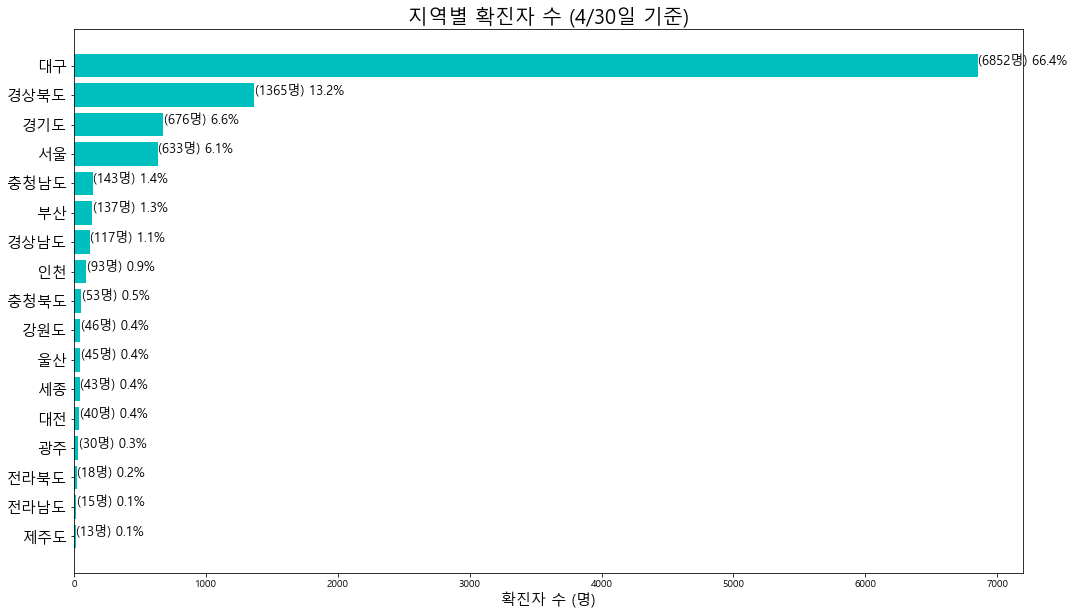

In [12]:
# 시간대별 지역 데이터 불러오기, 4/30일 데이터만
loc = pd.read_csv('TimeProvince.csv')
loc=loc[loc['date']=='2020-04-30']

loc_sort = sorted(list(zip(loc['province'],loc['confirmed'])),key=(lambda x:x[1]))
index_loc = [ x[0] for x in loc_sort]
values_loc = [ y[1] for y in loc_sort]

korean = ['제주도','전라남도','전라북도','광주','대전','세종','울산','강원도','충청북도','인천','경상남도','부산','충청남도','서울','경기도','경상북도','대구']
plt.figure(figsize=(17,10))

X=np.arange(len(korean))
plt.barh(X,values_loc,tick_label = korean,color='c')
plt.title('지역별 확진자 수 (4/30일 기준)',fontsize=20)
plt.xlabel('확진자 수 (명)',fontsize=15)
plt.yticks(fontsize=15)

vvv=[] ; totalloc=sum(values_loc)
for i in range(len(values_loc)):
    vvv.append(values_loc[i]/totalloc*100)


for x,y in enumerate(X):
    datall = "(%d명)"%values_loc[x]+" %.1f"%vvv[x]+"%"
    plt.text(values_loc[x]+3,y,datall, fontsize=13)
    

plt.show()

In [13]:
loc_sort = sorted(list(zip(loc['province'],loc['deceased'])),key=(lambda x:x[1]))
index_locd = [ x[0] for x in loc_sort]
values_locd = [ y[1] for y in loc_sort]

korean = ['제주도','전라남도','전라북도','광주','대전','세종','울산','강원도','충청북도','인천','경상남도','부산','충청남도','서울','경기도','경상북도','대구']

percent_death = []
for d in range(len(values_locd)):
    percent_death.append(values_locd[d]/values_loc[d])
    
korean_sort = sorted(list(zip(korean,percent_death)), key=lambda x : x[1])
korean = [k[0] for k in korean_sort]
percent_death = [k[1] for k in korean_sort]

pie = pyecharts.Pie("지역별 사망률(지역사망자 수/지역확진자 수) 순위", "그래프에 마우스를 올려놓으면 지역별 사망률을 나타냅니다",
          width=850, height=600)
pie.add("", korean, percent_death, center=[45,50], radius=[30,75], is_label_show=True, legend_orient='vertical', legend_pos='right')
pie

지역별 확진자 수를 막대그래프로 그려보면, 신천지 사태 발생지인 대구에서 전체 확진자 중 67%에 해당하는, 가장 많은 확진자가 나온 것을 알 수 있습니다. 그 뒤를, 경상북도, 경기도, 서울 순으로 확진자 수가 많은데요, 이를 통해 **사람과 사람의 접촉이 많은 대도시권에 많은 확진자가 발생하는 경향을 파악 할 수 있습니다.**

그리고 지역별 사망률을 각 지역의 확지자 수 대비 각 지역의 사망자 수로 판단했을 때, 경상북도가 가장 높은 사망률을 보였고 그 뒤를 대구와 경기도가 이어가고 있습니다.

## 1-5. 확진자 이동동선 파악 

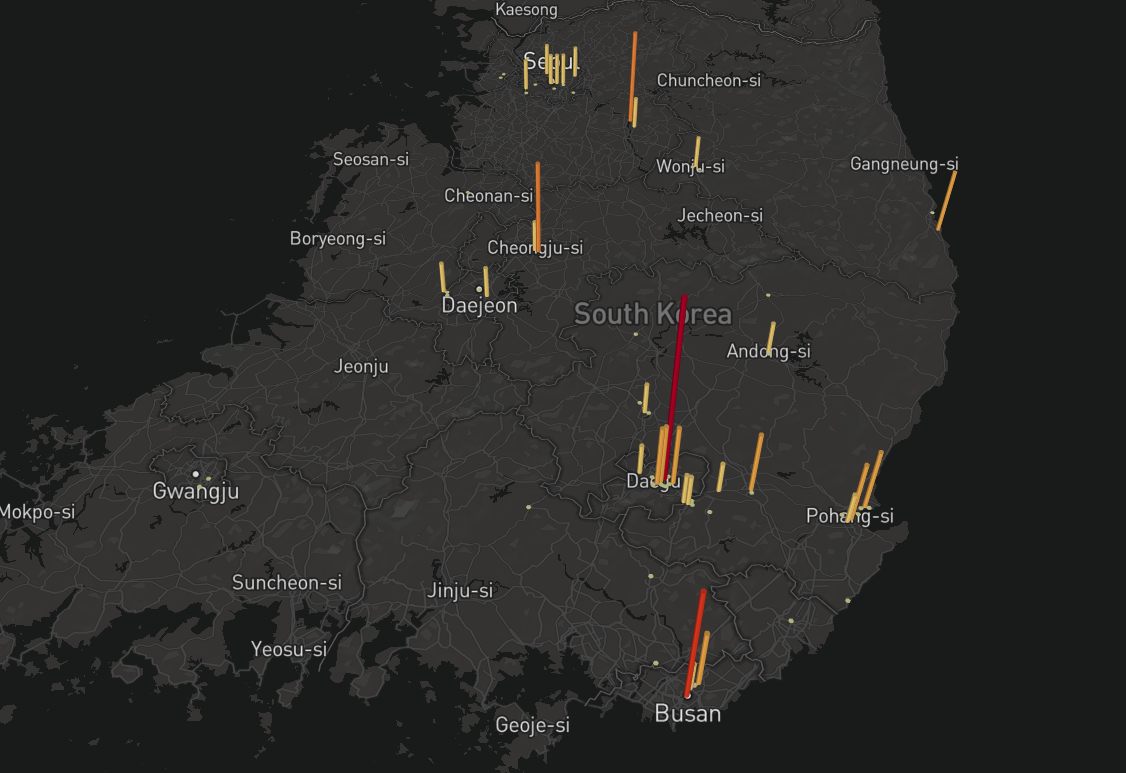

In [17]:
# 날짜 형식 변경
def changeint(date):
    d = date.split('-')
    return int(''.join(d))
PR_check = pd.read_csv('PatientRoute.csv')
PR_check['intdate'] = PR_check['date'].apply(changeint)
PR_check = PR_check.sort_values(by='intdate')

PR_check1 = PR_check[PR_check['intdate']==20200217]
PR_check2 = PR_check[PR_check['intdate']==20200317]

# 확진자가 방문한 곳, 날짜별 표시

#2020-02-17
layer = pydeck.Layer(
    'HexagonLayer',
    PR_check1,
    get_position='[lng, lat]',
    auto_highlight=True,
    elevation_scale=50,
    pickable=True,
    elevation_range=[0, 2000],
    extruded=True,                 
    coverage=1)

view_state = pydeck.ViewState(
    longitude=126.986,
    latitude=37.565,
    zoom=6,
    pitch=40.5,
    min_zoom=4,
    max_zoom=10,
    bearing=-27.36)

r = pydeck.Deck(layers=[layer], initial_view_state=view_state)
#r.to_html('visit.html')

# pydeck 데이터를 데이콘 상에서 바로 표시할 수 없어서 캡쳐 화면으로 대신했습니다.
# 아래 지도 그래프에 대한 자세한 사항은 해당 링크를 클릭하시면 보실 수 있습니다!
# 기존 ipywidgets을 활용하여 스크롤 이동을 통해 1월 전체와 2월 전체의 데이터를 확인하는 작업은 용량과 기능상의 문제로 
# 특정날짜만 보여주도록 설정했습니다.

Image('contact_visit_daegu.png')

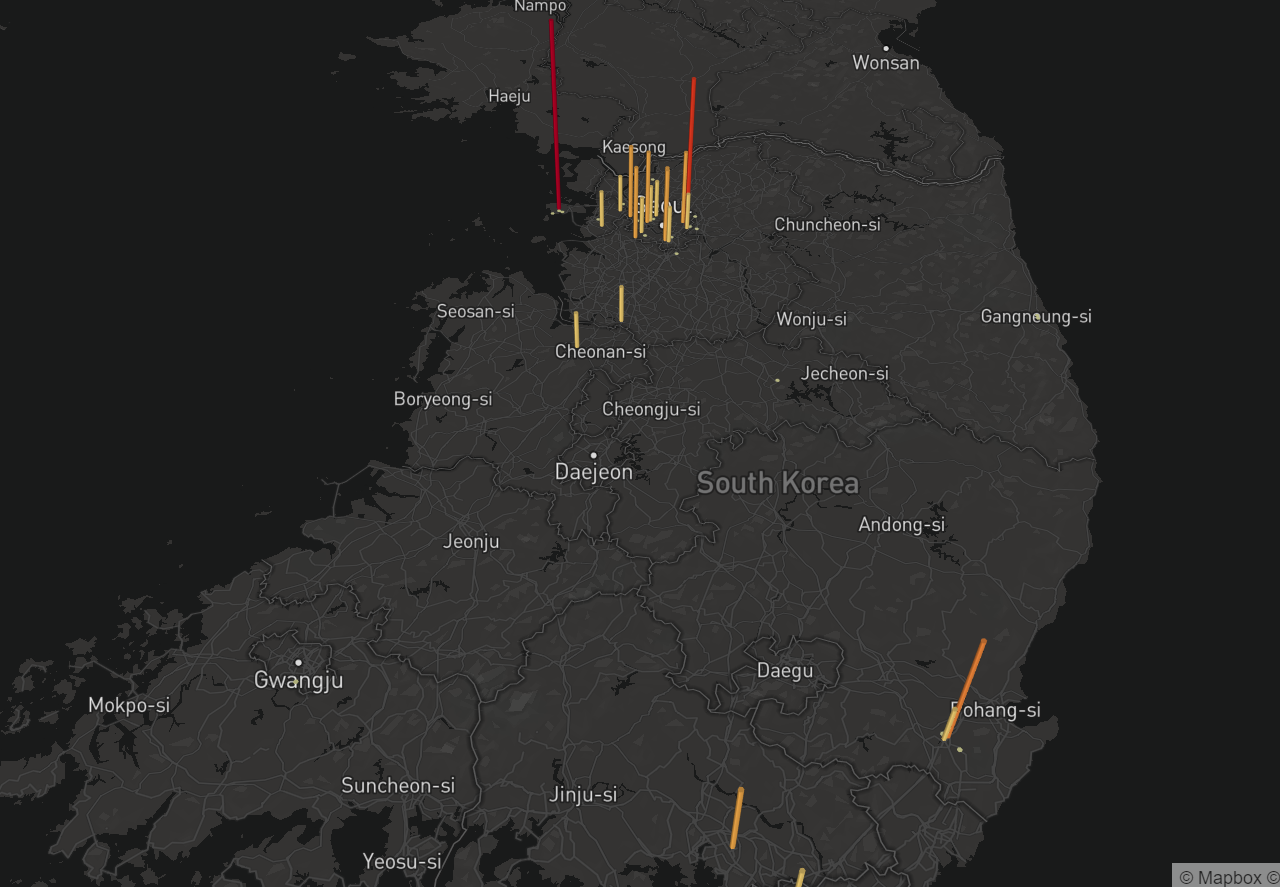

In [18]:
#2020-03-17
layer2 = pydeck.Layer(
    'HexagonLayer',
    PR_check2,
    get_position='[lng, lat]',
    auto_highlight=True,
    elevation_scale=50,
    pickable=True,
    elevation_range=[0, 2000],
    extruded=True,                 
    coverage=1)

view_state2 = pydeck.ViewState(
    longitude=126.986,
    latitude=37.565,
    zoom=6,
    min_zoom=4,
    max_zoom=15,
    pitch=40.5,
    bearing=-27.36)

r2 = pydeck.Deck(layers=[layer2], initial_view_state=view_state2)

#r2.to_html('visit2.html')

# pydeck 데이터를 데이콘 상에서 바로 표시할 수 없어서 캡쳐 화면으로 대신했습니다.
# 아래 지도 그래프에 대한 자세한 사항은 해당 링크를 클릭하시면 보실 수 있습니다!
# 기존 ipywidgets을 활용하여 스크롤 이동을 통해 1월 전체와 2월 전체의 데이터를 확인하는 작업은 용량과 기능상의 문제로 
# 특정날짜만 보여주도록 설정했습니다.

Image('contact_visit_seoul.png')

https://stu5073.github.io/Keum3/


위의 링크를 클릭하시면 위에 나와있는 pydeck을 이용한 지도 시각화를 자세하게 보실 수 있습니다!

pydeck라이브러리를 이용하여, 확진자가 방문한 곳이 많을수록 색이 붉어지고 높아지는 육각형 막대 그래프로 표현했습니다.

먼저,위쪽의 신천지 사태가 발생하기 시작한 2020-02-17일 확진자 방문지를 살펴보면 신천지 발생지인 대구가 집중적으로 많이 발생했고 대구 주변의 대도시들 역시 확진자의 방문이 많이 이루어졌음을 알 수 있습니다.

하지만 이로부터 한 달 뒤, 아랫쪽 그림인 2020-03-17일 확진자 방문지를 살펴보면, 대구 지역의 확진자 방문지는 눈에 띄지 않는 반면, 서울 및 인천국제공항 지역에서 높은 방문 횟수를 보이고 있습니다.

이를 통해, **대구지역의 확진자 선별 및 격리조치가 효과가 있었음을 알 수 있으며, 이와 동시에 해외에서 유입되는 확진자 수가 증가했음을 알 수 있습니다. 그 결과, 인천국제공항과 서울의 확진자 수가 증가할 것이라고 생각할 수 있습니다.**

# 2. 코로나 * 유동인구



## 2-1. 유동인구가 코로나에 끼치는 영향

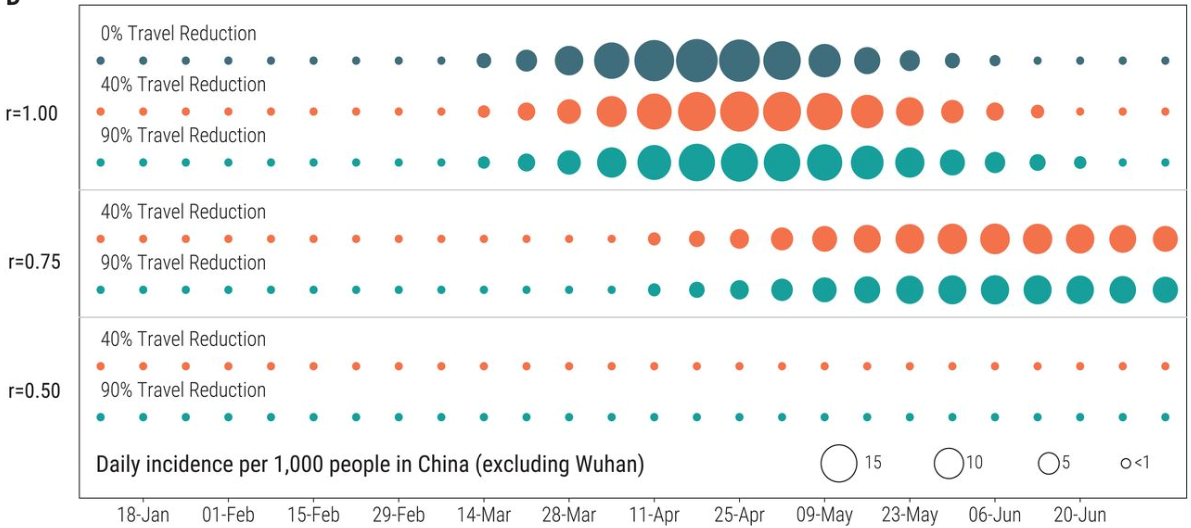

In [19]:
from PIL import Image
Image.open('study.png')

우리는 충격적인 집단감염(신천지 등)을 통해 코로나19 바이러스가 얼마나 전파력이 강한지 알 수 있었습니다. 

역학자 Matteo Chinazzi, Jessica T. Davis는 "The effect of travel restrictions on the spread of the 2019 novel coronavirus (COVID-19) outbreak"* 에서 여행/입국 제한과 **전파율 r의 변화**로 인한 시나리오를 바탕으로 코로나19 확산에 대한 연구를 진행하였습니다.

해당연구는 위 그림을 통하여 바이러스 전파율을 나타내는 r을 낮추는 것이 여행/입국 제한 정책보다(확산 시기를 늦출뿐 확산 자체를 막지는 못함을 시사) 훨씬 강력한 정책임을 시사하고 있습니다.
따라서 치료제가 나오기 전 코로나를 해결할 수 있는 **가장 강력한 방법은 r을 줄이는 것**, 즉 사회적으로 대면 접촉을 피하는 것이라는 것을 알 수 있었습니다.

우리 모두 알다시피 정부는 지난 5월 5일까지 '사회적 거리두기' 캠페인으로 감염 관리를 진행하였습니다.
<br>이렇게 r을 줄이는 유일한 방법인 사회적 거리두기의 실현 정도를 일별 유동인구 수로 측정하고 분석해보기로 하였습니다.
<br><br>
*출처-https://science.sciencemag.org/content/368/6489/395/tab-figures-data

## 2-2. 코로나 관심도와 유동인구 추이

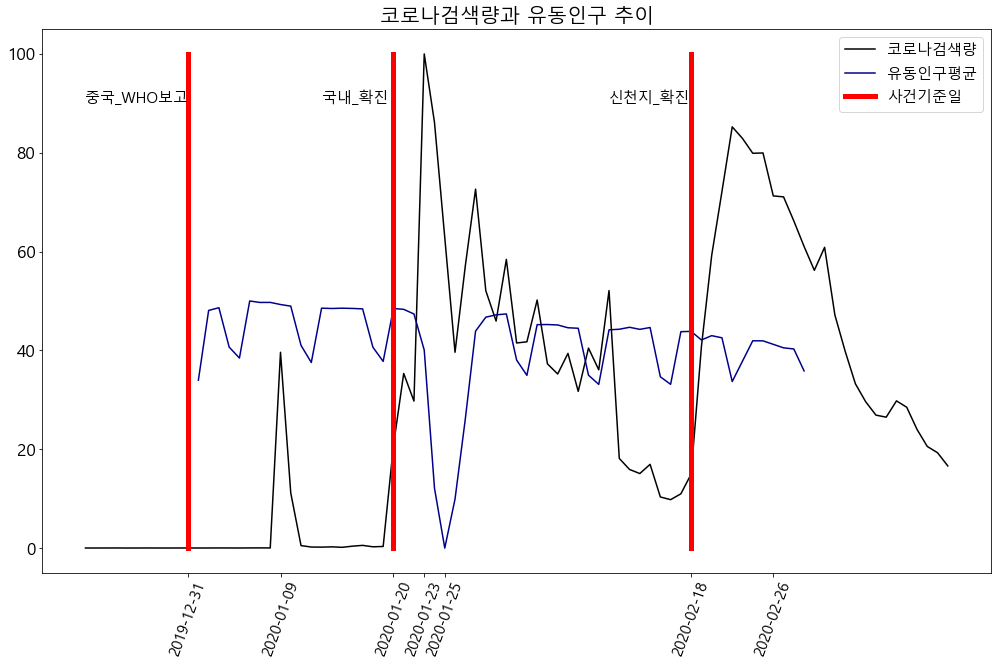

In [20]:
# 코로나 검색 데이터 및 서울 유동인구 데이터 불러오기
ST = pd.read_csv('SearchTrend.csv')
SF = pd.read_csv('SeoulFloating.csv')
SF = SF[SF['date']!='2020-02-23']

# 서울 유동인구 일별 평균 구한 후 정규화 실시
s=SF.groupby('date')['fp_num'].transform('mean')
x=np.array(s[1450:]).reshape(-1,1)
scaler = MinMaxScaler()
scaler.fit(x)
X_scaled = scaler.transform(x)*50

plt.figure(figsize=(17,10))
plt.plot(ST['date'][1450:1535],ST['coronavirus'][1450:1535],lw=1.5,c='black')
plt.plot(SF['date'][1450:],X_scaled,lw=1.5,c='darkblue')
plt.plot([ST['date'][ST[ST['date']=='2020-01-20'].index[0]],ST['date'][ST[ST['date']=='2020-01-20'].index[0]]],[0,100],lw=5, c='r')
plt.plot([ST['date'][ST[ST['date']=='2019-12-31'].index[0]],ST['date'][ST[ST['date']=='2019-12-31'].index[0]]],[0,100],lw=5, c='r')
plt.plot([ST['date'][ST[ST['date']=='2020-02-18'].index[0]],ST['date'][ST[ST['date']=='2020-02-18'].index[0]]],[0,100],lw=5, c='r')
plt.annotate('국내_확진',[ST['date'][ST[ST['date']=='2020-01-20'].index[0]-7],90],fontsize=15)
plt.annotate('중국_WHO보고',[ST['date'][ST[ST['date']=='2019-12-31'].index[0]-10],90],fontsize=15)
plt.annotate('신천지_확진',[ST['date'][ST[ST['date']=='2020-02-18'].index[0]-8],90],fontsize=15)
plt.xticks(['2019-12-31','2020-01-09','2020-01-20','2020-01-23','2020-01-25','2020-02-18','2020-02-26'],rotation=70, fontsize=15)
plt.yticks(fontsize=17)
plt.legend(['코로나검색량','유동인구평균','사건기준일'],loc='upper right',fontsize=15)
plt.title('코로나검색량과 유동인구 추이',fontsize=20)
plt.show()

('2020-02-23'일의 서울시 대중교통 데이터와 도로교통량 데이터를 살펴본 결과 서울의 유동인구가 감소했다고 판단했습니다.이에 따라, 'SeoulFloating.csv' 파일의 '2020-02-23'일의 유동인구가 급격히 증가한 점을 부정확하다고 판단하여 이 날짜를 제외하여 사용했습니다.)

위의 그래프를 보면, 중국 WHO 첫 보고 이후 코로나에 대한 관심( 관심도를 코로나 검색량으로 판단해볼 때)이 본격적으로 대중들에게 생기기 시작한 것을 알 수 있습니다. 
그러다 **국내 첫 확진 환자가 발생하면서 코로나 검색량이 한 순간 급속도로 증가했습니다. 이에 따라 2020-01-25일 주말, 유동인구가 잠시 감소한 순간이 있었지만, 코로나 바이러스가 지역 단위로 퍼지기 이전이었기 때문에 다시 유동인구가 일상 수준을 유지하는 것을 볼 수 있습니다.**

하지만 **신천지내 환자가 발생하며 지역단위 및 전국 단위 바이러스 확산이 이루어지게 되면서, 다시 한 번 코로나에 대한 국민적 관심도가 다시 증가함을 알 수 있습니다.**

## 2-3. 서울시 유동인구 3D지도 시각화

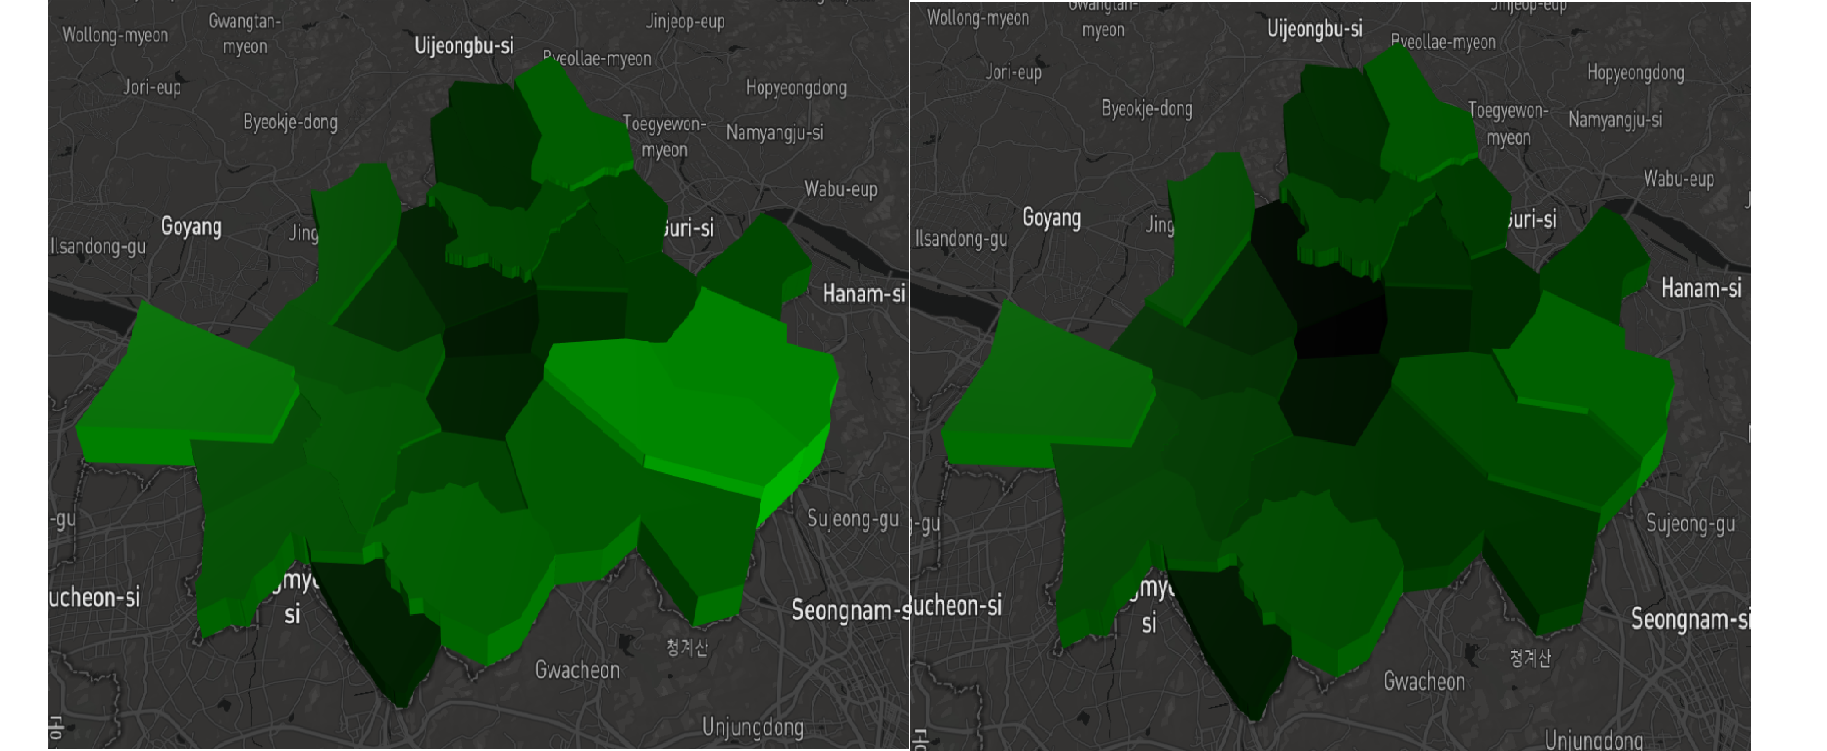

In [21]:
# 전국 행정구역별 geojson파일 불러오기
# 출처: 공공데이터포털
df = gpd.read_file('seoul.json')
df = df[['SIG_CD','SIG_ENG_NM','SIG_KOR_NM','geometry']]
df.columns = ['code','loc_eng','loc_kor','geometry']

# 서울데이터만 가져오기
seoul = ['강남구','강동구','강북구','강서구','관악구','광진구','구로구','금천구','노원구',
 '도봉구','동대문구','동작구','마포구','서대문구','서초구','성동구','성북구','송파구',
 '양천구','영등포구','용산구','은평구','종로구','중구','중랑구']

seoul_data = pd.DataFrame(columns=['code','loc_eng','loc_kor','geometry'])

for s in range(len(seoul)):
    sl = df[df['loc_kor']==seoul[s]]
    seoul_data = pd.concat([seoul_data,sl])

def multipolygon(data):
    long, lat  = data.exterior.xy
    d = [[x,y] for x,y in zip(long,lat)]
    return d

seoul_data['geometry'] = seoul_data['geometry'].apply(multipolygon)
seoull = pd.DataFrame(seoul_data)

SF.columns = ['date','hour','birth_year','sex','province','loc_eng','fp_num']
dongj = list(SF['loc_eng'])
for d in range(len(dongj)):
    if(dongj[d]=='Dongjag-gu'):
        dongj[d]='Dongjak-gu'
        
SF['loc_eng'] = dongj

sf = SF[['date','loc_eng','fp_num']]
ss = sf.groupby(['date','loc_eng']).mean()

# 유동인구 정규화 
x=np.array(ss['fp_num']).reshape(-1,1)
scaler = MinMaxScaler()
scaler.fit(x)
X_scaled = scaler.transform(x)
ss['normalized']=X_scaled

seul = ss.reset_index()
soul = pd.merge(seul,seoull, on = 'loc_eng')

def changeint(date):
    d = date.split('-')
    return int(''.join(d))

soul['intdate'] = soul['date'].apply(changeint)

soul1 = soul[soul['intdate']==20200118]
# pydeck으로 표현
layer = pydeck.Layer('PolygonLayer',  
                  soul1,
                  get_polygon='geometry', 
                  get_fill_color='[0, 255*normalized, 0]',  
                  pickable=True,  
                  auto_highlight=True, 
                     extruded = True,
                     get_elevation = 'fp_num',
                     elevation_scale=0.05
                 ) 

center = [126.986, 37.565] 
view_state = pydeck.ViewState( longitude=center[0], latitude=center[1], zoom=10) 

view_state.bearing=15 
view_state.pitch=45

r3 = pydeck.Deck(layers=[layer], initial_view_state=view_state) 

#r3.to_html('seoulfloat0118.html')

soul2 = soul[soul['intdate']==20200125]
# pydeck으로 표현
layer = pydeck.Layer('PolygonLayer',  
                  soul2,
                  get_polygon='geometry', 
                  get_fill_color='[0, 255*normalized, 0]',  
                  pickable=True,  
                  auto_highlight=True, 
                     extruded = True,
                     get_elevation = 'fp_num',
                     elevation_scale=0.05
                 ) 

center = [126.986, 37.565] 
view_state = pydeck.ViewState( longitude=center[0], latitude=center[1], zoom=10) 

view_state.bearing=15 
view_state.pitch=45

r3 = pydeck.Deck(layers=[layer], initial_view_state=view_state) 


#r3.to_html('seoulfloat0125.html')

# pydeck 데이터를 데이콘 상에서 바로 표시할 수 없어서 캡쳐 화면으로 대신했습니다.
# 아래 지도 그래프에 대한 자세한 사항은 해당 링크를 클릭하시면 보실 수 있습니다!
# 기존 ipywidgets을 활용하여 스크롤 이동을 통해 1월 전체와 2월 전체의 데이터를 확인하는 작업은 용량과 기능상의 문제로 
# 특정날짜만 보여주도록 설정했습니다.

from IPython.display import Image
Image('seoulfloat.png')

왼쪽 그림 : https://stu5073.github.io/Keum5/
오른쪽 그림: https://stu5073.github.io/Keum6/


위의 링크를 클릭하시면 위에 나와있는 pydeck을 이용한 지도 시각화를 자세하게 보실 수 있습니다!

위의 두 서울 행정구역 시각화는 각 구역의 색이 밝을수록, 높이가 높을수록 그 지역의 유동인구 평균이 높음을 의미하는데요, 왼쪽 그림은 (2020-01-18)일의 서울 유동인구를 표시한 것이고, 오른쪽은 국내 첫 확진자 발생 이후 (2020-01-25)일의 유동인구 평균 시각화입니다. 
<br>
<br>
이처럼 같은 요일의 유동인구평균을 국내 첫 확진 이전과 이후로 나누어 파악했을 때, 국내 첫 확진자 발생 이후 첫 주말 한 순간은 평소보다 유동인구가 급격히 감소했음을 쉽게 파악할 수 있습니다.
<br>
<br>
하지만 **그 이후 다시 평소와 유사한 유동인구 양상을 보인 결과에 따라, 아직까지 국내 지역감염의 사례가 보고되지 않았기 때문에 사람들에게 높은 경각심을 이때까진 주지 못한 것으로 추정할 수 있습니다.**
<br>
<br>
이러한 경과를 미루어 볼 때, 지속적으로 바이러스 전염에 대한 경각심을 촉구할 필요가 있다고 생각됩니다.

## 2-4. 서울시 유동인구에 따른 접촉자 수 파악

In [22]:
# 확진자 이동경로 데이터 불러오기
PR = pd.read_csv('PatientRoute.csv')
PI = pd.read_csv('PatientInfo.csv')
PR_check = PR[['patient_id','city','date','type','longitude','latitude','province']]
PR_check.columns = ['patient_id','loc_eng','date','type','lng','lat','province']
PR_check['text'] = list(zip(PR_check['patient_id'],PR_check['type']))

In [23]:
# 서울시 유동인구 & 확진자 방문지 동시 표시

PR_check['count']=1
pii=PI[['patient_id','contact_number','province']]
contact_check=pd.merge(PR_check,pii,on='patient_id')
contact_check['contact_number'] = contact_check['contact_number'].fillna(0)
contact_check['check_contact'] = list(zip(contact_check['patient_id'],contact_check['contact_number']))

def select_seoul(loc):
    if(loc in list(set(seoull['loc_eng']))):
       return 1
    else:
       return 0

contact_check['seoul_check'] = contact_check['loc_eng'].apply(select_seoul)
contact_check = contact_check[contact_check['seoul_check']==1]

2020-02-18 서울 접촉자 180  명


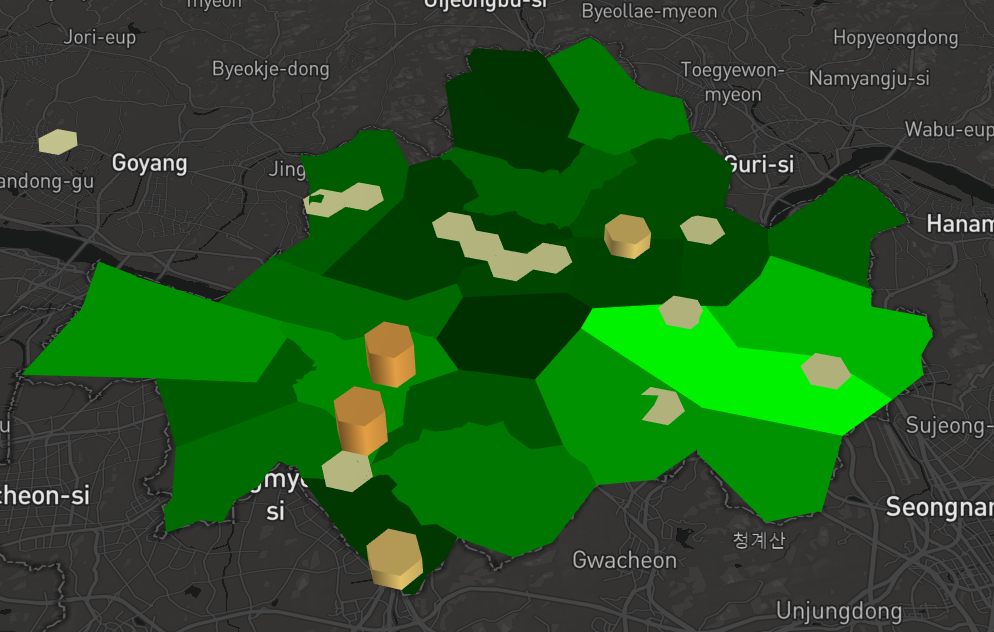

In [24]:
soul1 = soul[soul['intdate']==20200218]
layer = pydeck.Layer('PolygonLayer',  
                  soul1,
                  get_polygon='geometry', 
                  get_fill_color='[0, 255*normalized, 0]',  
                  pickable=True,  
                  auto_highlight=True
                 ) 
pr = PR_check[PR_check['date']=='2020-02-18']

layer2 = pydeck.Layer(
                    'HexagonLayer',
                    pr,
                    get_position='[lng, lat]',
                    auto_highlight=True,
                    elevation_scale=50,
                    pickable=True,
                    elevation_range=[0, 100],
                    extruded=True,                 
                    coverage=1)

center = [126.986, 37.565] 
view_state = pydeck.ViewState( longitude=center[0], latitude=center[1], zoom=10) 

view_state.bearing=15 
view_state.pitch=45

r33 = pydeck.Deck(layers=[layer,layer2], initial_view_state=view_state,tooltip=True) 

#r33.to_html('visitseoul0218.html')


check1 = list(set(contact_check[contact_check['date']=='2020-02-18']['check_contact']))
check2 = [x[1] for x in check1]
print("2020-02-18 서울 접촉자",int(sum(check2)),' 명')

# pydeck 데이터를 데이콘 상에서 바로 표시할 수 없어서 캡쳐 화면으로 대신했습니다.
# 아래 지도 그래프에 대한 자세한 사항은 해당 링크를 클릭하시면 보실 수 있습니다!
# 기존 ipywidgets을 활용하여 스크롤 이동을 통해 1월 전체와 2월 전체의 데이터를 확인하는 작업은 용량과 기능상의 문제로 
# 특정날짜만 보여주도록 설정했습니다.

from IPython.display import display, Image
Image('contact20200218.png')

https://stu5073.github.io/Keum4/ 

위의 링크를 클릭하시면 위에 나와있는 pydeck을 이용한 지도 시각화를 자세하게 보실 수 있습니다!

<br>
<br>
위의 지도 시각화는 신천지 집단 감염 사태가 보고된 (2020-02-18)에, 확진자가 방문한 곳을 육각형으로 표시하고 빈도를 높이로 표현한 것입니다. 코로나의 경우 잠복기가 긴만큼 자신이 확진자인지 모르는 경우가 상당수 있습니다. 이 날 데이터로 파악할 수 있는 확진자와 접촉한 사람은 서울시내 한정 **180명**으로 나타났습니다.

이처럼, **신천지 사태에 따라 사람들이 본격적으로 경각심을 가지기 이전, 이미 확진자와 접촉한 사람이 발생했음을 알 수 있습니다.** 

## 2-5. 지하철 승객수로 본 서울시 유동인구

In [25]:
jan_유동인구 = pd.read_csv('./서울_대중교통_승객/CARD_SUBWAY_MONTH_202001.csv', encoding='CP949')
fab_유동인구 = pd.read_csv('./서울_대중교통_승객/CARD_SUBWAY_MONTH_202002.csv', encoding='UTF-8')
mar_유동인구 = pd.read_csv('./서울_대중교통_승객/CARD_SUBWAY_MONTH_202003.csv', encoding='UTF-8')
apr_유동인구 = pd.read_csv('./서울_대중교통_승객/CARD_SUBWAY_MONTH_202004.csv', encoding='CP949')
apr_유동인구.tail()

사용일자  호선명    역명  승차총승객수  하차총승객수      등록일자
18308  20200401  1호선  종로5가   18925   19126  20200404
18309  20200401  1호선  종로3가   21991   20842  20200404
18310  20200401  1호선    종각   31105   30397  20200404
18311  20200401  1호선    시청   17943   17941  20200404
18312  20200401  1호선   서울역   31908   30546  20200404

유동인구 추이는 신천지 대규모 확산의 첫 날인 2월 18일 이후가 유의미하다고 판단하였지만, <br>
주어진 유동인구 데이터는 2월 말까지 업데이트되어 외부데이터* 를 사용하였습니다.

따라서 저희는 일별 서울시 대중교통 승객수를 유동인구 데이터로 사용하였으며 이를 통해<br>
**1. 코로나 발생 이전의 유동인구와 비교하여 얼마나 변화**하였는지,<br>
**2. 그동안 정부가 시행한 정책들이 유동인구에 얼마나 유의미한 영향**을 끼쳤는지
확인해보기로 하였습니다.



*출처: 서울열린데이터 광장-서울시 지하철호선별 역별 승하차 인원 정보

In [26]:
jan_유동인구_1 = jan_유동인구.reset_index()
del jan_유동인구_1['등록일자']
jan_유동인구_1.columns=['사용일자', '노선명', '역ID', '역명', '승차총승객수', '하차총승객수', '등록일자']

jan_유동인구_1 = jan_유동인구_1.sort_values(by='사용일자')
fab_유동인구 = fab_유동인구.sort_values(by='사용일자')
mar_유동인구 = mar_유동인구.sort_values(by='사용일자')
apr_유동인구 = apr_유동인구.sort_values(by='사용일자')

jan_유동인구_2 = jan_유동인구_1[['사용일자','승차총승객수']].groupby(by='사용일자').sum().reset_index()
fab_유동인구_1 = fab_유동인구[['사용일자','승차총승객수']].groupby(by='사용일자').sum().reset_index()
mar_유동인구_1 = mar_유동인구[['사용일자','승차총승객수']].groupby(by='사용일자').sum().reset_index()
apr_유동인구_1 = apr_유동인구[['사용일자','승차총승객수']].groupby(by='사용일자').sum().reset_index()

유동인구 = jan_유동인구_2.append([fab_유동인구_1,mar_유동인구_1,apr_유동인구_1])

from datetime import datetime

date = []
for i in list(유동인구['사용일자']) :
    a = datetime.strptime(str(i), '%Y%m%d').strftime('%Y-%m-%d')
    date.append(a)

유동인구['일자_1'] = date
유동인구['일자'] = pd.to_datetime(유동인구['일자_1'])
del 유동인구['일자_1']

유동인구['요일'] = 유동인구['일자'].dt.weekday
유동인구_1 = 유동인구[['일자','요일','승차총승객수']]

첫확진이전_요일별_승객수 = [8124059.0, 8141415.0, 8492225.0, 6400595.0, 4533571.0,7931538.0, 8051486.0]*20
첫확진이전_요일별_승객수 = 첫확진이전_요일별_승객수[:122]
a = pd.DataFrame(첫확진이전_요일별_승객수)

유동인구_1 = 유동인구_1.reset_index()
유동인구_2 = pd.concat([유동인구_1,a], axis=1)
유동인구_2.columns = ['index', '일자', '요일', '승차총승객수', '첫확진_전주_승객수']


subway1901 = pd.read_csv('CARD_SUBWAY_MONTH_201901.csv')
subway1902 = pd.read_csv('CARD_SUBWAY_MONTH_201902.csv')
subway1903 = pd.read_csv('CARD_SUBWAY_MONTH_201903.csv')
subway1904 = pd.read_csv('CARD_SUBWAY_MONTH_201904.csv')
subway1901
subway19 = pd.concat([subway1901,subway1902,subway1903,subway1904])

def changeform(x):
    return str(x)[:4]+'-'+str(x)[4:6]+'-'+str(x)[6:]

subway19['사용일자']=subway19['사용일자'].apply(changeform)

subway19 = subway19.groupby('사용일자')['승차총승객수'].sum()

subway19=subway19.reset_index()

def weekday(x):
    return datetime.strptime(x,'%Y-%m-%d').weekday()

subway19['요일'] = subway19['사용일자'].apply(weekday)

subway19.to_csv('subway19.csv',mode='w')

subway19 = pd.read_csv('subway19.csv')
subway19.columns=['emp','일자19','승차총승객수19','요일19']
subway19 = subway19[['일자19','승차총승객수19','요일19']]
subway19 = subway19.iloc[1:,:]
subway19 = subway19.reset_index()
subway19 = subway19[['일자19','승차총승객수19','요일19']]

# 윤년 버리기
유동인구_2 = 유동인구_2[유동인구_2['일자']!='2020-02-29']
유동인구_2 = 유동인구_2[유동인구_2['일자']!='2020-05-01']
유동인구_2 = 유동인구_2[['일자','요일','승차총승객수','첫확진_전주_승객수']]
유동인구_2 = 유동인구_2.reset_index()

유동인구19_20 = pd.concat([유동인구_2,subway19],axis=1)
유동인구19_20 = 유동인구19_20.dropna()
유동인구19_20.to_csv('유동인구19_20.csv',mode='w')
유동인구= pd.read_csv('유동인구19_20.csv')

유동인구['차이'] = 유동인구['승차총승객수'] - 유동인구['첫확진_전주_승객수']

## 2-6. 코로나 이후 유동인구 변화

In [27]:
line = Line("서울시 유동인구 추이",'2020년 1월 1일부터 2020년 4월 29일 대중교통 승차객과 (확진자 발생 전주 or 전년 동일요일 승차객)과 비교한 그래프입니다. 스크롤을 줄여 세부사항을 확인해보세요!',width=850,height=500 )
line.add("일별 지하철 승객수", 유동인구['일자'], 유동인구['승차총승객수']
         , mark_point_symbolsize=100,  mark_point_size=60 , legend_text_size=15, is_datazoom_show=True,datazoom_range=[0, 100] 
         ,mark_point=['max','min'], label_color=['black'], legend_pos='right', mark_line=["average"]
        )
line.add("첫 확진자 발생 전주(1.13~1.19) 승객수", 유동인구['일자'], 유동인구['첫확진_전주_승객수']
         , legend_text_size=15, label_color=['black'], legend_pos='right', mark_line=["average"]
       )

line.add("전년 승객수", 유동인구['일자'], 유동인구['승차총승객수19']
          , legend_text_size=15, label_color=['red'], legend_pos='right', mark_line=["average"]
       )

line

저희는 일별 서울 지하철 승차객 시각화를 통하여 
일주일 주기로 **평일에 점점 증가하다가 토요일에 급감, 일요일에 또다시 급감하는 주별(월~일) 주기**를 볼 수 있었습니다. (아래 스크롤을 좁혀보시면 상세히 볼 수 있습니다.)

코로나를 통하여 이러한 유동인구가 얼마나 변동하였는지 알기 위하여<br>
코로나 첫 확진자가 나왔던 1월 20일 이전 주인 1월 13일(월) ~ 1월 19일(일) 데이터와<br>
2019년도 동일한 시기 데이터와 비교하였습니다.

결과적으로, 비교대상인 1월 둘째주와 전년도 승객수는 각각 7396(천명) / 7382(천명)으로 그래프에서도 완전히 같은 수준임을 알 수 있고
그에 반해 올해 승객수와 비교대상(검은 그래프)의 차이가 크다는 것을 한 눈에 확인할 수 있었고<br>
특히, **2월 24일 주 부터는 유동인구가 급감했음**을 알 수 있었습니다.<br>
이는 4월 셋째주까지 지속되는 양상을 보이다가 넷째주부터는 서서히 증가하는 모습을 보이고 있습니다.

해당 그래프를 통해 코로나19 전파 이후 유동인구가 확연히 급감하였음을 볼 수 있었습니다.

## 2-7. 신규확진자에 따른 유동인구 변화

In [28]:
line = Line("신규확진자에 따른 유동인구 변동 추이",' 스크롤을 줄여 세부사항을 확인해보세요!',width=850,height=500 )
line.add("코로나 첫환자 발생 전과 비교한 유동인구(천명)", 유동인구['일자'], 유동인구['차이']/10000, 
         is_datazoom_show=True,datazoom_range=[0, 100]
         , mark_point_symbolsize=100,  mark_point_size=60 , legend_text_size=15 
         , label_color=['black'], legend_pos='right'
        )
line.add("전날대비 확진자 증감",코로나_확진현황_3['date'], 코로나_확진현황_3['전날대비_코로나환자']
         , mark_point_symbolsize=70, label_text_size=15, legend_text_size=15, label_color=['red']
         , legend_pos='right',mark_point=['max','min']
        )
line

코로나 첫환자 발생 이전주(1월 9일(월) ~ 1월 16일(일))와 해당 일자의 유동인구를 비교하여 시각화함으로 신규확진자 발생의 변동이 유동인구에 어떤 영향을 미치는지 확인해보았습니다.<br>
(1월과 4월의 이상치는 설날과 선거일로 인한 것으로 분석에서 제외함)

2월 29일 데이터에서 에서 볼 수 있듯이, 국민들은 **신규확진자 대규모 발생에 따른 공포 및 위기감을 느꼈을 때 실질적으로 이동을 강력히 제한하였습니다.**<br>
그 이후인 3월 22일부터 시행된 **강력한 사회적 거리두기 정책으로 인하여 이러한 추세가 지속되었을 것으로** 추측합니다.
<br>
<br>
<br>
이어서, 정부의 여러 정책이 유동인구에 어떠한 영향을 주었는지 시각화로 확인해보겠습니다.


## 2-8. 재난경보 단계에 따른 유동인구 변화

In [29]:
policy = pd.read_csv('Policy.csv')

# 재난경보 단계
alert_policy = policy[policy['gov_policy'] == 'Infectious disease alert level'][['gov_policy','detail','start_date','end_date']]
alert_policy = alert_policy.reset_index(drop=True)
alert_policy

gov_policy            detail  start_date    end_date
0  Infectious disease alert level    level 1 (Blue)  2020-01-03  2020-01-19
1  Infectious disease alert level  level 2 (Yellow)  2020-01-20  2020-01-27
2  Infectious disease alert level  level 3 (Orange)  2020-01-28  2020-02-22
3  Infectious disease alert level     level 4 (Red)  2020-02-23         NaN

In [30]:
day = [alert_policy.iloc[2,:]['start_date'],alert_policy.iloc[2,:]['end_date']]
a = [10000000,10000000]
day1 = [alert_policy.iloc[3,:]['start_date'],alert_policy.iloc[3,:]['end_date']]

line = Line("재난경보 단계로 보는 유동인구 추이",'' )
line.add("당일승객수", 유동인구['일자'], 유동인구['승차총승객수']
         , mark_point_symbolsize=100,  mark_point_size=60 , legend_text_size=15
         ,mark_point=['max','min'], label_color=['black'], legend_pos= 'right', mark_line=["average"]
        )
line.add("", 유동인구['일자'], 유동인구['첫확진_전주_승객수'], mark_line=["average"]
         , legend_text_size=15, label_color=['black'], legend_pos= 'right'
       )

line.add("전년승객수", 유동인구['일자'], 유동인구['승차총승객수19']
          , legend_text_size=15, label_color=['red'], legend_pos= 'right'
       )
line1 = Line()
line1.add('경보수준_level3',day,a, area_opacity=0.1, legend_pos= 'right' )
line1.add('경보수준_level4',['2020-02-23','2020-04-29'],a, area_opacity=0.1 , legend_pos= 'right')

overlap = Overlap(width=850,height=500)

overlap.add(line)
overlap.add(line1)

overlap

비교 데이터(전 주, 전 년_설명은 유동인구 추이 그래프에서) 대비 유동인구가 **급락한 첫날인 2월 23일은 <br>
정부가 위기 경보를 최고 단계인 심각(red)단계로 격상한 날**이었습니다.<br><br>
이 역시 위에서 언급한 바와 같이 **공포 및 위기감을 느꼈을 때 국민들이 즉각적으로 행동함**을 볼 수 있는 그래프 입니다.

## 2-9. 사회적거리두기 단계에 따른 유동인구 변화

In [32]:
# 사회적 거리두기
SD_policy = policy[policy['gov_policy'] == 'Social Distancing Campaign'][['gov_policy','detail','start_date','end_date']]
SD_policy = SD_policy.reset_index(drop=True)
SD_policy

gov_policy  detail  start_date    end_date
0  Social Distancing Campaign  strong  2020-03-22  2020-04-05
1  Social Distancing Campaign  strong  2020-04-06  2020-04-19
2  Social Distancing Campaign    weak  2020-04-20  2020-05-05

In [33]:
day = [SD_policy.iloc[0,:]['start_date'],SD_policy.iloc[0,:]['end_date']]
day1 = [SD_policy.iloc[1,:]['start_date'],SD_policy.iloc[1,:]['end_date']]
day2 = [SD_policy.iloc[2,:]['start_date'],SD_policy.iloc[2,:]['end_date']]
a = [10000000,10000000]

line = Line("사회적거리두기로 보는 유동인구",'' )
line.add("당일승객수", 유동인구['일자'], 유동인구['승차총승객수']
         , mark_point_symbolsize=100,  mark_point_size=60 , legend_text_size=15, mark_line=["average"]
         ,mark_point=['max','min'], label_color=['black'], legend_pos= 'right'
        )
line.add("", 유동인구['일자'], 유동인구['첫확진_전주_승객수']
         , legend_text_size=15, label_color=['black'], legend_pos= 'right', mark_line=["average"]
       )

line.add("전년승객수", 유동인구['일자'], 유동인구['승차총승객수19']
          , legend_text_size=15, label_color=['red'], legend_pos= 'right'
       )
line1 = Line()
line1.add('사회적거리두기1(강함)',day,a, area_opacity=0.1, legend_pos= 'right' )
line1.add('사회적거리두기2(강함)',day1,a, area_opacity=0.1, legend_pos= 'right' )
line1.add('사회적거리두기3(약함)',['2020-04-20','2020-04-29'],a, area_opacity=0.1, legend_pos= 'right')
overlap = Overlap(width=850,height=500)

overlap.add(line)
overlap.add(line1)

overlap

갑작스런 신규확진자 증가로 인하여 **급감했던 유동인구**가 신규확진자 감소와 코로나사태 둔화에도 **유지되는 양상**을 보이고 있습니다.<br>
이는 사회적거리두기 캠페인을 통하여 급감한 유동인구 추이를 지속시킬 수 있었을 것이라 예측됩니다.

## 2-10. 개학연기에 따른 유동인구 변화

In [34]:
# 개학연기
edu_policy = policy[policy['gov_policy'] == 'School Opening Delay'][['gov_policy','detail','start_date','end_date']]
edu_policy = edu_policy.reset_index(drop=True)
edu_policy

gov_policy             detail  start_date    end_date
0  School Opening Delay       kindergarten  2020-03-02  2020-04-06
1  School Opening Delay        high school  2020-03-02  2020-04-06
2  School Opening Delay      middle school  2020-03-02  2020-04-06
3  School Opening Delay  elementary school  2020-03-02  2020-04-06

In [35]:
day = [edu_policy.iloc[0,:]['start_date'],edu_policy.iloc[0,:]['end_date']]
a = [10000000,10000000]

line = Line("서울 대중교통 유동인구",'' )
line.add("당일교통량", 유동인구['일자'], 유동인구['승차총승객수']
         , mark_point_symbolsize=100,  mark_point_size=60 , legend_text_size=15
         ,mark_point=['max','min'], label_color=['black'], legend_pos= 'right', mark_line=["average"]
        )
line.add("", 유동인구['일자'], 유동인구['첫확진_전주_승객수']
         , legend_text_size=15, label_color=['black'], legend_pos= 'right', mark_line=["average"]
       )

line.add("전년교통량", 유동인구['일자'], 유동인구['승차총승객수19']
          , legend_text_size=15, label_color=['red'], legend_pos= 'right'
       )
line1 = Line()
line1.add('학교 개학연기',day,a, area_opacity=0.1, legend_pos= 'right' )
overlap = Overlap(width=850,height=500)

overlap.add(line)
overlap.add(line1)

overlap

위 그래프를 통하여 학교 개학연기에 해당하는 기간에 유동인구가 감소된 상태로 안정적으로 지속되고 있는 상황을 볼 수 있으며 <br>
이를 통하여, **학교의 개학 연기가 유동인구 제어에 효과적이었음**을 시사하고 있습니다.

# 3. 코로나 * 고령층


## 3-1. 연령대별 코로나 현황

In [36]:
# 확진자 정보 데이터 불러오기
PI = pd.read_csv('PatientInfo.csv')
age_time = pd.read_csv('TimeAge.csv')

PI['infected_by'] = PI['infected_by'].fillna(0)
PI['infected_by'] = PI['infected_by'].apply(lambda x: int(x))
PI.loc[2370,'age'] = '60s'

# 4/30일까지의 연령대별 확진자 및 사망자 비율
patient = age_time.tail(9)[['age','confirmed','deceased']]

index=list(patient['age'])
values_c = list(patient['confirmed'])
values_d = list(patient['deceased'])

totalc = sum(values_c)
totald = sum(values_d)

vvc =[] ; vvd=[]
for i in range(len(values_c)):
    vvc.append(round((values_c[i]/totalc*100),1))
    vvd.append(round((values_d[i]/totald*100),1))

In [37]:
bar2 = pyecharts.Bar("연령대별 감염자", "그래프에 마우스를 올려놓으면 각 연령대별 감염자를 나타냅니다")
bar2.add("수(명)", index, values_c, mark_line=["average"],mark_point=["max", "min"],is_label_show=True, 
         label_pos='inside',legend_pos= 'right')

line = pyecharts.Line("연령대별 감염자", "그래프에 마우스를 올려놓으면 각 연령대별 감염자를 나타냅니다")
line.add("비율(%)", index, vvc, mark_line=["average"],line_width=4,
         is_label_show=True, label_pos='inside', legend_text_size=15,legend_pos= 'right')

overlap = pyecharts.Overlap(width=850,height=500)
overlap.add(bar2)
overlap.add(line)

overlap

In [38]:
bar3 = pyecharts.Bar("연령대별 사망자", "그래프에 마우스를 올려놓으면 각 연령대별 사망자를 나타냅니다")
bar3.add("수(명)", index, values_d, mark_line=["average"], mark_point=["max", "min"],is_label_show=True, label_pos='inside',
         label_color=['#5C7A9A'], legend_pos= 'right')

line0 = pyecharts.Line("연령대별 사망자", "그래프에 마우스를 올려놓으면 각 연령대별 사망자를 나타냅니다")
line0.add("비율(%)", index, vvd, mark_line=["average"],is_label_show=True, label_pos='inside',
         label_color=['#CD9061'], legend_text_size=15,legend_pos= 'right',line_width=4)

overlap = pyecharts.Overlap(width=850,height=500)
overlap.add(bar3)
overlap.add(line0)

overlap

알려진바와 같이, 젊은 청년층보다 고령층의 바이러스 치사율이 높음을 확인할 수 있습니다. 이와 함께, **주목할 점은 20대의 경우, 치사율은 낮지만 확진자 수가 다른 연령대 보다 약 10% 이상 많다는 것입니다.**

이는 **20대 사람들이 사회적 거리두기를 다른 연령대에 비해 잘 지키지 않는다는 가능성을 시사**한다고 생각해 볼 수 있습니다. 20대의 경우 코로나 바이러스에 감염되도 치명적이지 않을 수도 있지만, 고령층의 경우 생명과 직결될만큼 위험하므로 **바이러스 전파 위험에 대한 책임이 필요해 보입니다.**

In [39]:
# 연령대별 전파 횟수 파악
PI['count_value']=1
spread = list(PI[PI['infected_by']!=0]['infected_by'])
spread_id = list(set(spread))

spread_age=[]
spread_age_dup=[]

for ag1 in range(len(spread_id)):
    try:
        sa1 = PI[PI['patient_id']==spread_id[ag1]]['age'].values[0] 
        spread_age.append(sa1)
    except:
        spread_age.append('None_data')


for ag2 in range(len(spread)):
    try:
        sa2 = PI[PI['patient_id']==spread[ag2]]['age'].values[0]
        spread_age_dup.append(sa2)
    except:
        spread_age_dup.append('None_data')

pi = PI[PI['infected_by']!=0]
pi['spread_age'] = spread_age_dup
pi_age = pi[['count_value','spread_age']]
pi_age = pi_age.dropna()

sd = pi_age.groupby('spread_age')['count_value'].sum()
indexx = list(sd.index)
values = list(sd.values)

totalv = sum(values) ; vv=[]
for v in range(len(values)):
    vv.append(round((values[v]/totalv*100),1))

In [40]:
bar4 = pyecharts.Bar("연령대별 전파", "그래프에 마우스를 올려놓으면 각 연령대별 전파를 나타냅니다")
bar4.add("수(명)", indexx[:len(indexx)-1], values[:len(values)-1], mark_line=["average"], mark_point=["max", "min"],is_label_show=True, label_pos='inside',
        legend_pos= 'right')
line1 = pyecharts.Line("연령대별 전파", "그래프에 마우스를 올려놓으면 각 연령대별 전파를 나타냅니다")

line1.add("비율(%)", indexx[:len(indexx)-1], vv[:len(vv)-1], mark_line=["average"],line_width=4,
         is_label_show=True, label_pos='inside',label_color=['#5C7A9A'], legend_text_size=15,legend_pos= 'right')

overlap = pyecharts.Overlap(width=850,height=500)
overlap.add(bar4)
overlap.add(line1)

overlap

데이터 결측값이 많아 정확한 해석이 어려울 수 있으나, 그래프 결과상으로만 보면 40대의 전파 횟수가 가장 많음을 알 수 있습니다. 아무래도 코로나 사태에도 불구하고 직장을 다녀야하는 세대인만큼 이동 범위가 넓고 사람과의 접촉 기회가 많을 것으로 추정됩니다. 

**따라서, 40대 근처 연령대의 경우 생활방역을 준수하고 불필요한 만남을 최대한 피해야할 필요가 있을것으로 보입니다.**

## 3-2. 고령층 감염경로

In [41]:
# 코로나 확진자 데이터 불러오기
patient = pd.read_csv('PatientInfo.csv')
aged_pat = patient[(patient['age'] == '60s')|(patient['age'] == '70s')|
                (patient['age'] == '80s')|(patient['age'] == '90s')][['province','age','infection_case']]
aged_inf = pd.DataFrame(aged_pat['infection_case'].value_counts())

# 감염 경로를 한글로 변경
# 확진자 수가 3명 미만인 곳은 '기타'로 표시
aged_inf.rename(index={'contact with patient':'확진자와의 접촉', 'etc':'기타', 'overseas inflow':'해외 유입',
                      'Bonghwa Pureun Nursing Home':'요양원', 'Shincheonji Church':'신천지 교회',
                      "Eunpyeong St. Mary's Hospital":'병원', 'Gyeongsan Seorin Nursing Home':'요양원',
                      'Gyeongsan Jeil Silver Town':'실버 타운', 'Guro-gu Call Center':'구로구 콜센터',
                      'Gyeongsan Cham Joeun Community Center':'커뮤니티 센터', 'Cheongdo Daenam Hospital':'병원',
                      'Onchun Church':'교회', 'Dongan Church':'교회', 'Geochang Church':'교회',
                      'gym facility in Cheonan':'기타', 'Seongdong-gu APT':'기타', 'Pilgrimage to Israel':'기타',
                      'Changnyeong Coin Karaoke':'기타'}, inplace=True)
aged_inf2 = aged_inf.groupby(aged_inf.index).sum().sort_values(by='infection_case', ascending=False)

In [42]:
attr = aged_inf2.index
v1 = aged_inf2['infection_case']

pie = Pie("고령층 확진자 감염 경로", "그래프에 마우스를 올려놓으면 장소별 고령층 확진자 수를 나타냅니다",
          width=850, height=600)
pie.add("",attr, v1, center=[45,50], radius=[30,75], is_label_show=True, label_text_size=15,
        legend_orient='vertical', legend_pos='right', legend_text_size=14)
pie

앞서 연령대별 코로나 현황을 파악한 결과, 비교적 적은 확진자 수에 비해 치사율이 눈에 띄게 높은 고령층에 초점을 두고 코로나 감염 경로를 분석해보았습니다.

여기서 주목해야 할 점은 **주로 알려진 감염 경로 이외에도 요양원이나 실버 타운 등에서 적지 않은 수가 감염**이 되었다는 사실인데요, **이에 따라 교회나 병원뿐만 아니라 고령층이 집단으로 생활하는 시설에는 더욱 철저한 생활 방역이 필요하다는 점을 알 수 있습니다.**

## 3-3. 지역별 고령화에 따른 코로나 검사 속도 파악

In [43]:
# 전국 선별진료소 목록 데이터 불러오기
# 출처: https://www.mohw.go.kr/react/popup_200128_3.html
df1 = pd.read_excel('선별진료소목록.xlsx')
df2 = pd.read_excel('승차검진_선별진료소_목록.xlsx')
df1 = df1[['주소']]
df2 = df2[['주소']]
df1.columns = ['address']
df2.columns = ['address']

df = pd.concat([df1,df2])

In [44]:
# 네이버 지도 api를 이용하여 선별진료소 주소별 위도, 경도 가져오기
import json
import requests
import urllib.request
from bs4 import BeautifulSoup

def geocode(loc):
    client_id = '9gota9i7vf'
    client_secret = '10yqEXKDdDcs49cm6qnMAzwDtZEJKtQfMBaWEwAC'
    encText = urllib.parse.quote(loc)
    url = 'https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query=' + encText
    request = urllib.request.Request(url)
    request.add_header('X-NCP-APIGW-API-KEY-ID',client_id)
    request.add_header('X-NCP-APIGW-API-KEY',client_secret)
    response = urllib.request.urlopen(request)
    rescode = response.getcode()
    if(rescode==200):
        response_body = response.read()
        return response_body.decode('utf_8')
    else:
        print('ERROR :', rescode)
        
        
#lat=[]; long=[]
#for k in range(len(df['address'])):
#    try:
#        temp = geocode(list(df['address'])[k])
#        temp = json.loads(temp)
#        temp = temp['addresses'][0]
#        lat.append(float(temp['y']))
#        long.append(float(temp['x']))
#    except:
#        lat.append('')
#        long.append('')
#df['lat'] = lat
#df['long'] = long
#df.to_csv('hospital.csv',mode='w')

In [45]:
hos = pd.read_csv('hospital.csv')
hos = hos[['long','lat']]
hos.columns = ['lng','lat']
hos = hos.dropna()

In [46]:
# 2020년 인구 및 고령화 데이터 가져오기
# 출처: 서울시빅데이터
aged = pd.read_csv('aged_korea.csv',encoding='cp949')
aged = aged[['행정구역별(1)','행정구역별(2)','2020. 03','2020. 03.1','2020. 03.2']][1:]
aged.columns = ['city','loc_kor','aged_per','aged_num','population']
aged.iloc[82,1]='세종특별자치시'
aged = aged[aged['loc_kor']!='소계']

In [47]:
df = gpd.read_file('seoul.json')
df = df[['SIG_CD','SIG_ENG_NM','SIG_KOR_NM','geometry']]
df.columns = ['code','loc_eng','loc_kor','geometry']

In [48]:
def multipolygon(data):
    long, lat  = data.exterior.xy
    d = [[x,y] for x,y in zip(long,lat)]
    return d

def short_form(data):
    if(' ' in data or len(data)>=5):
        return data[:data.find('시')+1]
    else:
        return data

#df['geometry'] = df['geometry'].apply(multipolygon)
df = pd.DataFrame(df)
df['loc_kor'] = df['loc_kor'].apply(short_form)

In [49]:
# 서울시 행정구역 코드 데이터 불러오기
# 출처: 공공데이터포털
sigun = pd.read_csv('sigungu.csv',encoding='cp949')
sigun= sigun[['LAWD_CD','SIDO_NM','SGG_NM']]
sigun.columns = ['code','city','loc_kor']
sigun['code'] = sigun['code'].apply(lambda x:str(x)[:5])
sigun = sigun.drop_duplicates()
sigun = sigun.dropna()

In [50]:
def short_form(data):
    if(' ' in data or len(data)>=5):
        return data[:data.find('시')+1]
    else:
        return data
    
sigun['loc_kor'] = sigun['loc_kor'].apply(short_form)
sigun.iloc[17,2]='세종특별자치시'

In [51]:
a=pd.merge(df,sigun,on=['code','loc_kor'])
aged_final = pd.merge(aged,a,on=['city','loc_kor'])

In [52]:
# 고령화 비율 정규화
x= np.array(aged_final['aged_per']).reshape(-1,1)
scaler = MinMaxScaler()
scaler.fit(x)
X_scaled = scaler.transform(x)
aged_final['normalized']=X_scaled

In [53]:
aged_final2= aged_final.copy()
aged_final2['geometry'] = aged_final2['geometry'].apply(multipolygon)

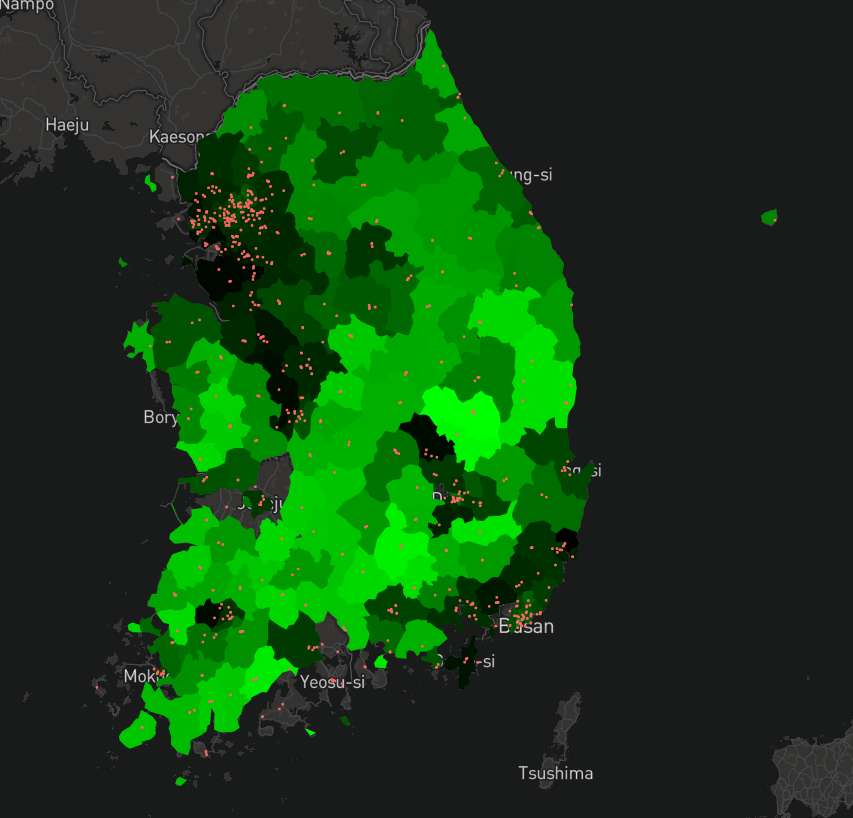

In [54]:
# 전국 선별진료소 위치 표시 
layer_hos = pydeck.Layer(
    'ScatterplotLayer',
    hos,
    get_position='[lng, lat]',
    get_radius=1000,
    get_fill_color='[250, 100, 100]',
    pickable=True, 
    auto_highlight=True
)

layer_pop = pydeck.Layer('PolygonLayer',  
                  aged_final2,
                  get_polygon='geometry', 
                  get_fill_color='[0, 255*normalized, 0]',  
                  pickable=True,  
                  auto_highlight=True
                 ) 


center = [126.986, 37.565]
view_state = pydeck.ViewState(
    longitude=126.986,
    latitude=37.565,
    zoom=6)

r222 = pydeck.Deck(layers=[layer_pop,layer_hos], initial_view_state=view_state)

#r222.to_html('hospital.html')

# pydeck 데이터를 데이콘 상에서 바로 표시할 수 없어서 캡쳐 화면으로 대신했습니다.
# 아래 지도 그래프에 대한 자세한 사항은 해당 링크를 클릭하시면 보실 수 있습니다!
Image('hospital.png')

위의 그림은 지도 색이 밝을수록 고령화 비율이 높음을 나타냅니다. 그리고 붉은 색 점이 선별진료소를 나타내고 있습니다.

그림을 살펴보면, 고령화 비율이 높은 지역일수록 선별진료소의 개수가 적음을 알 수 있습니다. 특히, 대도시권에 선별진료소가 밀집되어 있습니다. **이에 따라, 지역내 고령화가 높을수록, 선별진료소가 적을수록 코로나 검진 속도가 늦을 것이라는 가정을 생각해 볼 수 있습니다.**

## 3-4. 지역별 & 연령대별 검진속도

In [55]:
PI_check = PI[['patient_id','city','province','confirmed_date','infected_by','symptom_onset_date','age']]
PI_check.columns = ['patient_id','loc_eng','province','date','infected_by','symptom_date','age']

# 지역데이터 불러오기
region = pd.read_csv('region.csv')
region = region[['city','province','longitude','latitude']]
region.columns = ['loc_eng','province','lng','lat']

pi = pd.merge(PI_check, region,on=['loc_eng','province'],how='inner')
pi = pi.sort_values('date')
pi['symptom_date'] = pi['symptom_date'].fillna(0)
pi = pi.dropna()

# 증상발현날짜와 확진날짜 차이 계산
between_day=[]
for day in range(len(pi)):
    if(list(pi['date'])[day]!=0 and list(pi['symptom_date'])[day]!=0):
        between = datetime.strptime(list(pi['date'])[day],'%Y-%m-%d') - datetime.strptime(list(pi['symptom_date'])[day],'%Y-%m-%d')
        between_day.append(between.days)
    else:
        between_day.append('')
        
pi['between'] = between_day

pi_between = pi[pi['between']!='']
pi_between['count'] = 1 

num_b = pi_between.groupby('province')['between'].sum()
num_c = pi_between.groupby('province')['count'].sum()

num_b_value = list(num_b.values)
num_c_value = list(num_c.values)
mean_value = [round((num_b_value[x]/num_c_value[x]),1) for x in range(len(num_b_value))]
province = list(num_b.index)


location = ['부산','충청남도','대전','경기도','경상북도','경상남도','인천','전라북도','세종','서울','울산']

In [56]:
bar5 = pyecharts.Bar("증상발현 이후 확진검진까지의 일자", "그래프에 마우스를 올려놓으면 각 지역별 날짜 차이 평균을 나타냅니다")
bar5.add("날짜 차이 평균", location, mean_value, mark_line=["average"], mark_point=["max", "min"],is_label_show=True, label_pos='inside',
         label_color=['#C4E8E5'], mark_point_textcolor = ['black'],  label_text_color=['black'], legend_text_size=15,legend_pos= 'right')


bar5.height = 500
bar5.width = 850
bar5

확진자 정보 데이터에서 **증상이 발현된 날짜와 확진 판정을 받은 날짜 차이를 지역별로 구해 평균**을 내어 검진속도를 구했습니다. 
<br>
<br>
증상이 발현된 날짜 데이터의 결측값이 많아 단정할 순 없지만, 확보한 데이터만으로 미루어 볼 때, 전라북도가 증상이 발현한 지 12일 만에 코로나 확진 판정을 받았습니다. 하지만 전라북도의 증상발현 데이터 개수가 다른 지역에 비해 부족하므로 그 다음으로 평균 검진속도가 느린 세종시, 대전, 경상북도의 데이터를 살펴봤습니다. 그리고 이 세 지역 중 가장 고령층이 많이 거주하고 있는 경상북도에 집중해보겠습니다.
<br><br>
**경상북도의 선별진료소 분포와 고령비율을 고려해보면 '시'단위의 도시 이외에도 '군'단위 지역들이 위치해 있고, 도시에 집중된 선별진료소에 따라 진료 희망자가 몰린다면 군 단위 지역의 거주자의 경우 진료를 위해 도시로 나가야하는 문제가 제기됩니다.** 고령층에게 코로나 바이러스가 치명적이고 빠른 치료가 필요한만큼, **고령층에 대한 코로나 검진 접근성을 지속해서 관리해야할 필요가 있습니다.**

In [57]:
gb_age = pi_between[pi_between['province']=='Gyeongsangbuk-do']
gb_age_sum = gb_age.groupby('age')['count'].sum()
gb_bw_sum = gb_age.groupby('age')['between'].sum()

gb_a_index = list(gb_age_sum.index)
gb_a_value = list(gb_age_sum.values)
gb_b_value = list(gb_bw_sum.values)

for k in range(len(gb_b_value)):
    gb_b_value[k] = round((gb_b_value[k]/gb_a_value[k]),1)

line = pyecharts.Line("경북 연령대별 검진 속도", "그래프에 마우스를 올려놓으면 각 연령대별 평균 검진 속도를 나타냅니다")
bar6 = pyecharts.Bar("경북 연령대별 검진 속도", "그래프에 마우스를 올려놓으면 각 연령대별 평균 검진 속도를 나타냅니다")

line.add("연령대별 검진 평균 속도", gb_a_index , gb_b_value, mark_line=["average"], mark_point=["max", "min"],
         is_label_show=True, label_pos='inside',label_color=['#CD9061'],line_width=5,legend_pos= 'right' )

bar6.add("연령대별 경북 확진자 수", gb_a_index , gb_a_value, mark_line=["average"], mark_point=["max", "min"],
         is_label_show=True, label_pos='inside',label_color=['black'],legend_pos= 'right')

overlap = pyecharts.Overlap(width=850,height=500)
overlap.add(line)
overlap.add(bar6)

overlap

앞서 그래프에서 데이터가 상대적으로 많고 연령층이 높은 경상북도가 증상발현 이후 확진판정을 받기까지의 기간이 평균 6.4일 걸렸습니다(이 날짜 차이를 검진속도로 보겠습니다.).
<br><br>
물론 증상발현일을 알 수 있는 확진자 데이터가 부족하지만, 가지고 있는 데이터만을 가지고 판단해보겠습니다. 경상북도의 환자 데이터를 보면 확진자 수(증상발현일이 있는 환자만)는 20대가 가장 많고 고령층은 적은 편이지만,**고령층에 대한 검진 속도는 (특히 60대) 다른 연령대에 비해 느리다는 것을 알 수 있습니다.** 

**즉, 고령층의 선별진료소의 접근성이 쉽게 이루어지지 않음을 시사하고 있습니다.**

## 3-5. 음압병상 및 격리병상 현황

In [58]:
# 전국 음압/격리병상 데이터 불러오기
# 출처 : 보건복지부 및 질병관리본부
sickbed = pd.read_csv('음압_격리병상.csv', header=1)
sickbed_df = sickbed[['city','sickbed_total']].rename(columns={'city':'province'})

# 코로나 확진자 데이터 지역 이름 한글로 변경
aged_pat.loc[aged_pat['province'] == 'Seoul', "province"] = "서울특별시"
aged_pat.loc[aged_pat['province'] == 'Gyeonggi-do', "province"] = '경기도'
aged_pat.loc[aged_pat['province'] == 'Gangwon-do', "province"] = '강원도'
aged_pat.loc[aged_pat['province'] == 'Chungcheongbuk-do', "province"] = '충청북도'
aged_pat.loc[aged_pat['province'] == 'Chungcheongnam-do', "province"] = '충청남도'
aged_pat.loc[aged_pat['province'] == 'Jeollabuk-do', "province"] = '전라북도'
aged_pat.loc[aged_pat['province'] == 'Jeollanam-do', "province"] = '전라남도'
aged_pat.loc[aged_pat['province'] == 'Gyeongsangbuk-do', "province"] = '경상북도'
aged_pat.loc[aged_pat['province'] == 'Gyeongsangnam-do', "province"] = '경상남도'
aged_pat.loc[aged_pat['province'] == 'Jeju-do', "province"] = '제주특별자치도'
aged_pat.loc[aged_pat['province'] == 'Ulsan', "province"] = '울산광역시'
aged_pat.loc[aged_pat['province'] == 'Daejeon', "province"] = '대전광역시'
aged_pat.loc[aged_pat['province'] == 'Gwangju', "province"] = '광주광역시'
aged_pat.loc[aged_pat['province'] == 'Incheon', "province"] = '인천광역시'
aged_pat.loc[aged_pat['province'] == 'Daegu', "province"] = '대구광역시'
aged_pat.loc[aged_pat['province'] == 'Busan', "province"] = '부산광역시'

aged_pat2 = pd.DataFrame(aged_pat[['province','age']].groupby('province').count())
aged_pat2.drop(['Sejong'], axis=0, inplace=True)
aged_pat2 = aged_pat2.sort_values(by=['province']).reset_index(inplace=False)

aged_pat3 = pd.merge(aged_pat2, sickbed_df, on='province', how='outer')

In [59]:
attr1 = ['강원','경기','경남','경북','광주','대구','대전','부산','서울','울산','인천','전남','전북','충남','충북','제주']
v1 = aged_pat3['sickbed_total']

bar = Bar("지역별 음압병상 및 격리병상 현황", "그래프에 마우스를 올려놓으면 음압/격리병상 수를 나타냅니다",
         width=850, height=500)
bar.add("음압/격리병상 개수", attr1, v1, mark_point=['max','min'], mark_line=['average'],
          is_label_show=True, label_pos='inside', label_color=['#4F788D'], legend_pos='right', legend_text_size=15)
bar

코로나와 같은 감염병 환자의 경우 바이러스가 병실 밖으로 확산되는 것을 방지하기 위해 음압병실에서 치료를 받는 것이 원칙이지만, 병실이 부족한 상황에서는 일반 격리병실을 이용하게 됩니다.

따라서 의료인프라의 현황을 파악하고자 전국 음압병상 데이터와 국가지정 격리병상 데이터를 활용해보았습니다. <br><br>
그 결과, **서울에는 평균을 훨씬 뛰어 넘는 435개의 음압/격리병상이 있는 반면, 경기도와 경상남도, 부산광역시를 제외한 모든 지역이 평균에 미치지 못하는** 것으로 나타났습니다.

## 3-6. 고령층 확진자 대비  음압/격리병상 수용력

In [60]:
# 지역별 고령층 확진자 대비 병상 수용력 칼럼 추가
aged_pat3['capacity'] = round((aged_pat3['sickbed_total']/aged_pat3['age']), 1)

# 고령층 확진자가 없는 제주도 행 생략
aged_pat4 = aged_pat3.drop(15, axis=0, inplace=False)

In [61]:
attr2 = ['강원','경기','경남','경북','광주','대구','대전','부산','서울','울산','인천','전남','전북','충남','충북']
v2 = aged_pat4['capacity']

bar = Bar("고령층 확진자 수 대비 음압/격리병상 수용력", "그래프에 마우스를 올려놓으면 수용률을 나타냅니다",
         width=850, height=500)
bar.add("음압/격리병상 수용률 (배)", attr2, v2, mark_point=['max','min'], mark_line=['average'],
       is_label_show=True, label_pos='inside', label_color=['#4C82B4'], legend_pos='right', yaxis_formatter='배', legend_text_size=15)
bar

이번 코로나 사태에 따른 고령층 확진자 수에 비추어 보았을 때, **의료인프라 부족 현상은 더욱 심각합니다.**

고령층 확진자만을 대상으로 비교한 것임에도 불구하고, <br>
광주광역시와 전라남도를 제외한 모든 지역에서 음압/격리병상의 수용력이 저조한 모습을 보이고 있습니다. <br><br>
특히, **경기도나 경상북도의 경우에는 고령층 확진자조차 제대로 수용하지 못했다는** 사실을 알 수 있습니다.
<br><br><br>
하지만, 지역별로 코로나 전파 정도의 편차가 큰 것을 고려하여
고령확진자를 전국 확진자 대비 고령자 확진비율로 환산하여 재계산해보도록 하겠습니다.

## 3-7. 지역별 예상 고령층 확진자 대비 음압/격리병상 수용력

In [62]:
# 전체 고령층 확진자 수 구하기
confirmed = pd.read_csv('TimeAge.csv')
confirmed = confirmed[confirmed['date']=='2020-04-30'][['age', 'confirmed']].reset_index(drop=True)
aged_confirmed = confirmed[(confirmed['age'] == '60s')|(confirmed['age'] == '70s')|
                          (confirmed['age'] == '80s')]['confirmed'].sum()

# 전체 인구 수 구하기 (2020년 인구 데이터 불러오기)
# 출처 : 서울시빅데이터
population = pd.read_csv('2020년_인구.txt', sep=',')
population.drop(['Unnamed: 0'], axis=1, inplace=True)
total_population = population['population'].sum()

# 고령층 확진률 구하기 (전체 인구 수 대비 전체 고령층 확진자 수)
confirm_rate = aged_confirmed/total_population
confirm_rate

4.903247186057881e-05

In [63]:
# 지역별 인구 수 구하기
population2 = population[['city','population']].rename(columns={'city':'province'})
pop_df = pd.DataFrame(population2.groupby('province').sum())
pop_df.drop(['세종특별자치시'], axis=0, inplace=True)
pop_df.reset_index(inplace=True)

# 전국 병상 + 지역별 인구 수 데이터
df1 = pd.merge(sickbed_df, pop_df, on='province')
df1.sort_values(by=['province'], inplace=True)
df1 = df1.reset_index(drop=True)

# 지역별 예상 고령층 확진자 수 구하기 (고령층 확진률 * 지역별 인구 수)
df1['pre_confirm'] = round(confirm_rate*df1['population'], 0)

# 지역별 예상 고령층 확진자 대비 음압/격리 병상 수용력 칼럼 추가
df1['capacity2'] = round((df1['sickbed_total']/df1['pre_confirm']), 2)
df1.head()

province  sickbed_total  population  pre_confirm  capacity2
0      강원도             52     1538577         75.0       0.69
1      경기도            163    13288975        652.0       0.25
2     경상남도             98     3355341        165.0       0.59
3     경상북도             67     2653418        130.0       0.52
4    광주광역시             36     1455705         71.0       0.51

In [64]:
attr3 = ['강원','경기','경남','경북','광주','대구','대전','부산','서울','울산','인천','전남','전북','제주','충남','충북']
v3 = df1['capacity2']

bar = Bar("예상 고령층 확진자 대비 음압/격리병상 수용력", "그래프에 마우스를 올려놓으면 수용률을 나타냅니다",
         width=850, height=500)
bar.add("음압/격리병상 수용률 (배)", attr3, v3, mark_point=['max','min'], mark_line=['average'],
       is_label_show=True, label_pos='inside', label_color=['#BD8964'], legend_pos='right', yaxis_formatter='배', legend_text_size=15)
bar

대구광역시나 경상북도가 아닌 다른 지역에서 집단 감염이 발생할 경우를 가정하여, <br>
지역별 인구 수에 고령층 코로나 확진률을 곱함으로써 지역별로 예상되는 고령층 확진자 수를 구해보았습니다. <br>
<br>
그에 대한 음압/격리병상의 수용력은 위 그래프와 같습니다.

**만일 경기도나 인천광역시, 전라북도, 대전광역시와 같이 수용력이 매우 낮게 나타나는 지역에서** 집단 감염이 발생했다면 
더 큰 문제가 될 수 있었던 상황이기 때문에, 지역별 음압/격리병상 수를 더욱 확대할 필요가 있을 것으로 보입니다.

## 3-8. 지역별 예상 고령층 확진자 대비 필요한 음압/격리병상 수

In [65]:
# capacity2가 평균 미만인 지역별 필요한 병상 수 계산
capacity2_mean = df1['capacity2'].mean()

df1['needed_bed'] = round(capacity2_mean*df1['pre_confirm'] - df1['sickbed_total'], 0)
df2 = df1[df1['needed_bed'] > 0][['province','needed_bed']]
df2.reset_index(drop=True, inplace=True)
df2

province  needed_bed
0      경기도       201.0
1     경상북도         6.0
2    광주광역시         4.0
3    대전광역시        13.0
4    울산광역시         3.0
5    인천광역시        27.0
6     전라북도        16.0
7     충청남도        14.0

In [66]:
# 행정구역 데이터 불러오기
# 출처 : 공공데이터포털
with open('korea2.json', 'r',encoding='utf-8') as f:
    data = json.load(f)

map1 = folium.Map(location=[37.565,126.986],zoom_start=7,tiles='OpenStreetMap')
map1.choropleth(geo_data = data, data=df2,
               columns=['province','needed_bed'],
               key_on='feature.properties.CTP_KOR_NM',
               fill_color='YlGn',
               legend_name = 'Needed Sickbed')
map1

그렇다면, 지역별로 몇 개의 음압/격리병상이 필요한 것일까요? <br><br>

위의 지도는 **예상 고령층 확진자 대비 음압/격리병상 수용력이 평균 미만인 지역을 대상으로 필요한 병상 수**를 계산하여 지도로 나타낸 결과입니다.

**색이 진할수록 필요한 음압/격리병상의 수가 많다는 것**을 의미하며, 병상을 추가로 설치하지 않아도 무방한 지역은 검은 색으로 표시되고 있습니다.

이에 따라 음압/격리병상의 **수용력을 평균 수준으로 향상시키기 위해서는 경기도가 201개, 인천광역시가 27개, 전라북도가 16개 정도의 음압/격리병상을 필요로 한다**는 사실을 알 수 있습니다.

<br><br><br><br>

## 4. 결론 및 제언

### 현황 측면

- 2월, 신천지 사태에 따른 대구 및 근처 지역에 대한 전파가 심화되다가 3월에 접어들면서 해외 확진자 유입에 따른 인천국제공항 및 수도권 지역의 전파가 심화되었습니다.<br><br>

- 바이러스 확산 속도가 매우 빠르지만, 이와 함께 (확산 속도보다는 느리지만) 완치 속도 또한 상당히 빠르다는 것을 확인할 수 있었습니다.
<br><br>

### 유동인구 측면
- 코로나사태에 가장 중요한 것은 전파율이며, 코로나를 이겨낼 수 있는 가장 강력한 방법은 '사회적거리두기' 인것을 확인하였습니다.<br><br>

- 코로나사태 이후 유동인구가 확연히 감소된 양상을 확인할 수 있었으며,사람들은 신규확진자 대규모 발생으로 인해 공포 및 위기감을 느꼈을 때 이동을 **즉각적으로 제한했고 강력한 사회적 거리두기 정책으로 인하여 이러한 추세가 지속되었을 것으로** 보입니다.<br><br>

- 20대가 가장 높은 전염율을 보이고 있으며, 20대의 미흡한 사회적 거리두기 참여가 코로나전파에 주요 원인 중 하나로 보입니다. **20대는 고령층이 코로나로 인한 사망리스크에 노출되어 있음을 인지하고 책임감을 가질 필요**가 있습니다.<br><br>

- 40대 중년층의 경우, 가장 높은전파를 나타냈으며 이는 40대가 사회적으로 가장 넓은 반경으로 사회적 활동을 하는 것에 비롯된 것으로 보입니다. **40대는 이러한 세대적 구조을 인지하고, 다른 세대보다 강력한 사회적 거리두기를 실천할 필요**가 있어보입니다.<br><br>

### 고령층 측면
- 고령화 비율이 높은 지역의 선별진료소의 개수가 적어, **고령층의 선별진료소에 대한 접근성이 다소 취약해 보입니다.**<br><br>

- 코로나 사망률이 가장 높았던 고령세대의 관점에서 분석한 결과 지역별로 충분한 음압병상 및 격리병상을 확보하지 못하고 있음을 알 수 있었으며, 경기도를 중심으로 병상 수를 신설할 필요가 있어보입니다. **고령층이 코로나 바이러스에 위험한 만큼 시기적절한 검진과 치료가 중요하다고 생각되며, 이후로는 코로나 관련 예산을 고령층 의료 인프라 확충하는 것에 배치할 필요성**이 높아 보입니다.<br><br>





<br><br><br><br>
# 저희 글을 읽어주셔서 진심으로 감사드립니다 ! 
## 코로나 다같이 이겨내봅시다 !!!


##  - job_seeker


